# dataverwerking kernfysica

In [1]:
import numpy as np
import sympy as sp
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import scipy.optimize as opt
import scipy.stats as nst

sp.init_printing()

EXTENSIE = "pdf"

In [2]:
# functie om symbolisch foutenpropagatie uit te voeren
def error(func, variables, S_variables):
    return sp.sqrt(sum([sp.diff(func, var)**2 * S_var**2 for (var, S_var) in zip(variables, S_variables)]))

In [3]:
mpl.rcParams["figure.dpi"] = 150

## identificatie straling 

Ingeven metingen

In [4]:
achtergrond = np.array([3, 2, 9, 2, 6, 4, 3, 1, 7])
zonder = np.array([2789, 2702, 2744, 2629, 2797, 2826, 2734, 
                   2752, 2682])
folie = np.array([2584, 2586, 2665, 2624])
papier = np.array([1727, 1669, 1701, 1711])
Al1 = np.array([183, 148, 137, 124, 143, 137, 131, 128])
Al4 = np.array([127, 132, 126, 111, 106, 129, 144, 119])
Pb4 = np.array([103, 123, 110, 91, 97, 89, 112, 108])
metingen = [achtergrond, zonder, folie, papier, Al1, Al4, Pb4]

Berekenen gemiddeldes en fout erop

In [5]:
# door gebruik te maken van formule gewogen gemiddelde. S_i^2 = meting
# want de metingen zijn Poisson verdeeld
gemiddeldes = np.array([np.dot(meting, 1/meting)/np.sum(1/meting) for meting in metingen])
S_gemiddeldes = np.array([1/np.sqrt(np.sum(1/meting)) for meting in metingen])

namen = np.array(["achtergrond", "zonder", "folie", "papier", "Al1", "Al2", "Pb4"])

achter = gemiddeldes[0]
S_achter = S_gemiddeldes[0]

for naam, gemiddelde, fout in zip(namen, gemiddeldes, S_gemiddeldes):
    
    print("%s: %.1f +- %.3f" %(naam, gemiddelde-achter, np.sqrt(fout**2 + S_achter**2)))

achtergrond: 0.0 +- 0.774
zonder: 2735.5 +- 17.451
folie: 2611.6 +- 25.571
papier: 1699.0 +- 20.633
Al1: 136.9 +- 4.212
Al2: 120.5 +- 3.962
Pb4: 100.3 +- 3.630


In [6]:
df = pd.DataFrame([namen, gemiddeldes, S_gemiddeldes])
df = df.transpose()

# corrigeer voor de achtergrondstarling
df[1].loc[1:6] -= df[1].loc[0]
df[2].loc[1:6] = np.sqrt(np.array(df[2].values[1:7]**2 + df[2].values[0]**2, dtype=np.float64))

# verander de indexkolom naar de namen van de metingen
df.index = df[0]
del df[0]

# print de latex code voor de tabel
print(df.round(1).to_latex())

\begin{tabular}{lll}
\toprule
{} &        1 &         2 \\
0           &          &           \\
\midrule
achtergrond &  2.69679 &  0.547397 \\
zonder      &  2735.51 &   17.4512 \\
folie       &  2611.64 &   25.5711 \\
papier      &  1699.04 &   20.6333 \\
Al1         &  136.862 &   4.21243 \\
Al2         &  120.515 &   3.96246 \\
Pb4         &  100.327 &    3.6301 \\
\bottomrule
\end{tabular}



In [7]:
np.sqrt(np.array(df[2].values[1:7]**2 + df[2].values[0]**2, dtype=np.float64))

array([17.45978328, 25.57699551, 20.64056449,  4.24784332,  4.00009074,
        3.67114254])

## Nagaan kwadratisch verband

In [8]:
achtergrond = np.array([4,5,1,3,1])

_29 = np.array([1004, 1033, 1059, 1057])
_39 = np.array([528, 535, 526, 475])
_49 = np.array([313, 338, 358, 319])
_59 = np.array([226, 201, 230, 214])
_69 = np.array([156, 174, 163, 166, 150, 152])
_79 = np.array([106, 111, 124, 136, 124, 125])
_89 = np.array([93, 83, 88, 98, 91, 91, 95])
_99 = np.array([80, 78, 77, 74, 81, 68, 74, 80])
_109 = np.array([56, 58, 52, 59, 57, 66, 42, 54, 35, 64, 47, 46, 59, 56])
_159 = np.array([33, 24, 22, 22, 22, 21, 30, 20, 27, 32, 23, 22])

metingen = [achtergrond, _29, _39, _49, _59, _69, _79, _89, _99, _109, _159]

In [9]:
# door gebruik te maken van formule gewogen gemiddelde. S_i^2 = meting
# want de metingen zijn Poisson verdeeld
gemiddeldes = [np.dot(meting, 1/meting)/np.sum(1/meting) for meting in metingen]
S_gemiddeldes = [1/np.sqrt(np.sum(1/meting)) for meting in metingen]

namen = ["achtergrond", "29mm", "39mm", "49mm", "59mm", "69mm", "79mm", "89mm", "99mm", "109mm", "159mm"]
afstanden = [29, 39, 49, 59, 69, 79, 89, 99, 109, 159]

achter = gemiddeldes[0]
S_achter = S_gemiddeldes[0]

for naam, gemiddelde, fout in zip(namen, gemiddeldes, S_gemiddeldes):
    
    print("%s: %.1f +- %.3f" %(naam, gemiddelde-achter, np.sqrt(fout**2 + S_achter**2)))

achtergrond: 0.0 +- 0.848
29mm: 1036.0 +- 16.118
39mm: 513.0 +- 11.361
49mm: 329.3 +- 9.118
59mm: 215.4 +- 7.392
69mm: 157.9 +- 5.194
79mm: 118.4 +- 4.515
89mm: 89.3 +- 3.656
99mm: 74.5 +- 3.145
109mm: 50.4 +- 2.021
159mm: 22.4 +- 1.541


In [10]:
df = pd.DataFrame([namen, gemiddeldes, S_gemiddeldes])
df = df.transpose()

# corigeer voor de achtergrondstraling
df[1].loc[1:10] -= df[1].loc[0]
df[2].loc[1:10] = np.sqrt(np.array(df[2].values[1:11]**2 + df[2].values[0]**2, dtype=np.float64))

# verander de indexkolom naar de namen van de metingen
df.index = df[0]
del df[0]

# print de latex code voor de tabel
print(df.round(1).to_latex())

\begin{tabular}{lll}
\toprule
{} &        1 &         2 \\
0           &          &           \\
\midrule
achtergrond &  1.79641 &  0.599401 \\
29mm        &  1035.97 &   16.1183 \\
39mm        &  513.037 &   11.3608 \\
49mm        &  329.287 &   9.11757 \\
59mm        &  215.351 &   7.39231 \\
69mm        &  157.939 &   5.19441 \\
79mm        &  118.384 &   4.51546 \\
89mm        &  89.2629 &   3.65619 \\
99mm        &  74.4768 &   3.14538 \\
109mm       &    50.38 &   2.02143 \\
159mm       &  22.3725 &   1.54057 \\
\bottomrule
\end{tabular}



In [11]:
# verwijder de waardes van de achtergrondstraling, hierdoor moet niet gefit worden
del gemiddeldes[0]
del S_gemiddeldes[0]

### Met eerste datapunt 

fitten data

In [12]:
def inverse_square(x, a):
    return a/x**2

param, covar = opt.curve_fit(inverse_square, afstanden, gemiddeldes, (40000), S_gemiddeldes)
display(param, covar)

# p-waarde fit
chi2 = sum([(gemiddelde - inverse_square(afstand, param[0]))**2/fout**2 for 
        gemiddelde, afstand, fout in zip(gemiddeldes, afstanden, 2*np.array(S_gemiddeldes))])
p = 1-nst.chi2.cdf(chi2, len(afstanden)-1)

array([774929.67745948])

array([[6.86647552e+08]])

In [13]:
display(chi2,p)

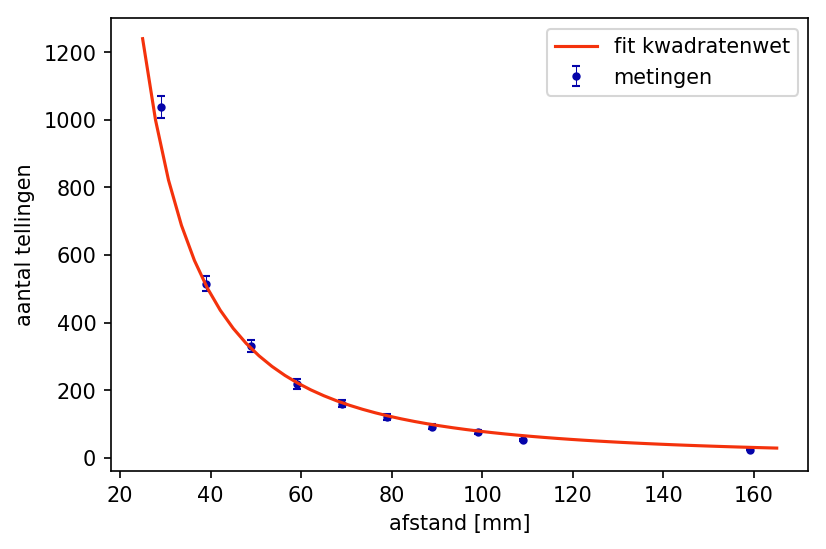

In [14]:
fig, ax = plt.subplots(1,1)

ax.errorbar(afstanden, gemiddeldes, 2*np.array(S_gemiddeldes), fmt='.', color="xkcd:royal blue",
           capsize=2, barsabove=True, linewidth=0.5, label="metingen")
X = np.linspace(25, 165)
ax.plot(X, inverse_square(X, param[0]), color="xkcd:vermillion", label="fit kwadratenwet")

#plt.title("Fit kwadratische afname intensiteit")
ax.set_xlabel("afstand [mm]")
ax.set_ylabel("aantal tellingen")
plt.legend()

plt.show()

fig.savefig("kwadratisch_verband1.%s" %EXTENSIE, dpi=300)

### Zonder eerste datapunt 

In [15]:
# verwijder de waardes van de meting op de kleinste afstand
del gemiddeldes[0]
del S_gemiddeldes[0]
del afstanden[0]

fitten data

In [16]:
def inverse_square(x, a):
    return a/x**2

param, covar = opt.curve_fit(inverse_square, afstanden, gemiddeldes, (40000), S_gemiddeldes)
display(param, covar)

# p-waarde fit
chi2 = sum([(gemiddelde - inverse_square(afstand, param[0]))**2/fout**2 for 
        gemiddelde, afstand, fout in zip(gemiddeldes, afstanden, 2*np.array(S_gemiddeldes))])
p = 1-nst.chi2.cdf(chi2, len(afstanden)-1)

array([739167.06383591])

array([[4.57646806e+08]])

In [17]:
display(chi2,p)

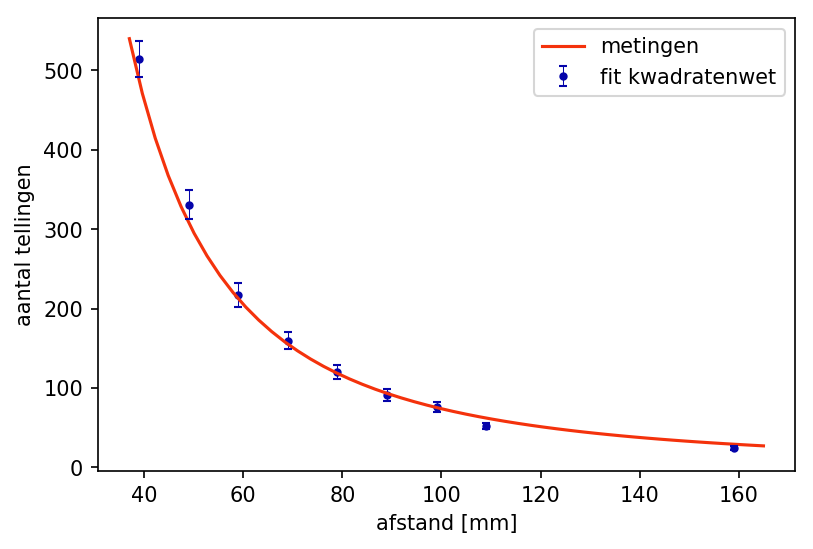

In [18]:
fig, ax = plt.subplots(1,1)

X = np.linspace(37, 165)
ax.plot(X, inverse_square(X, param[0]), color="xkcd:vermillion", label="metingen")
ax.errorbar(afstanden, gemiddeldes, 2*np.array(S_gemiddeldes), fmt='.', color="xkcd:royal blue",
           capsize=2, barsabove=True, linewidth=0.5, label="fit kwadratenwet")

#plt.title("Fit kwadratische afname intensiteit")
ax.set_xlabel("afstand [mm]")
ax.set_ylabel("aantal tellingen")
plt.legend()

plt.show()

fig.savefig("kwadratisch_verband2.%s" %EXTENSIE, dpi=300)

## Absorbtie

Ingeven data

In [19]:
achtergrond = np.array([3,6,2,2,4,5])

lood5 = np.array([77, 61, 90, 62, 60, 73, 86, 75, 61, 58, 66, 64])
lood10 = np.array([61, 54, 60, 58, 52, 52, 52, 51, 58, 63, 57, 59])
lood15 = np.array([27, 47, 43, 33, 36, 52, 40, 45, 36, 40, 36, 36])
lood20 = np.array([40, 25, 34, 27, 39, 27, 38, 25, 27, 37, 51, 26])
lood30 = np.array([16, 17, 19, 17, 30, 23, 13, 22, 25, 23, 17, 18])

lood = [lood5, lood10, lood15, lood20, lood30]

ijzer5 = np.array([72, 73, 77, 74, 65, 74, 69])
ijzer10 = np.array([56, 64, 72, 63, 78])
ijzer15 = np.array([55, 56, 50, 52, 52])
ijzer20 = np.array([55, 46, 41, 42, 47])
ijzer30 = np.array([38, 35, 37, 31, 36])

ijzer = [ijzer5, ijzer10, ijzer15, ijzer20, ijzer30]

diktes = np.array([5, 10, 15, 20, 30])

In [20]:
# bereken de gewogen gemiddeldes en de fout erop voor de metingen met lood
Pb = np.array([np.dot(meting, 1/meting)/np.sum(1/meting) for meting in lood])
S_Pb = np.array([1/np.sqrt(np.sum(1/meting)) for meting in lood])

# berekend de gewogen gemiddeldes en de fout erop voor de metingen met ijzer
Fe = np.array([np.dot(meting, 1/meting)/np.sum(1/meting) for meting in ijzer])
S_Fe = np.array([1/np.sqrt(np.sum(1/meting)) for meting in ijzer])

Formules voor foutenpropagatie

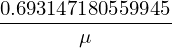

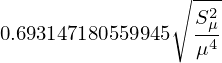

In [21]:
mu, I, S_mu = sp.symbols("mu, I, S_mu")
d12 = np.log(2)/mu
S_d12 = error(d12, [mu], [S_mu])
display(d12, S_d12)

### Lood

In [22]:
# functie om te fitten
def tellingen(x, A, a):
    return A*np.exp(-a*x)

# fit de functie door de laatste datapunten
param_Pb2, covar_Pb2 = opt.curve_fit(tellingen, diktes[2:], Pb[2:], (500, 0.01), S_Pb[2:])

# fit de functie door de eerste datapunten - de vorige fit
param_Pb1, covar_Pb1 = opt.curve_fit(tellingen, diktes[:3], 
                                     Pb[:3] - tellingen(diktes[:3], *param_Pb2),(500, 0.01), S_Pb[:3])

In [23]:
# berekenen p-waardes op de fits
chi2 = np.sum((tellingen(diktes[2:], *param_Pb2) - Pb[2:])**2 / S_Pb[2:]**2)
p = 1-nst.chi2.cdf(chi2, 3)
display(p, chi2)
# p-waarde voor fit lage energie
chi2 = np.sum((tellingen(diktes[:3], *param_Pb1) - Pb[:3] + 
               tellingen(diktes[:3], *param_Pb2))**2 / S_Pb[:3]**2)
p = 1-nst.chi2.cdf(chi2, 3)
display(p, chi2)

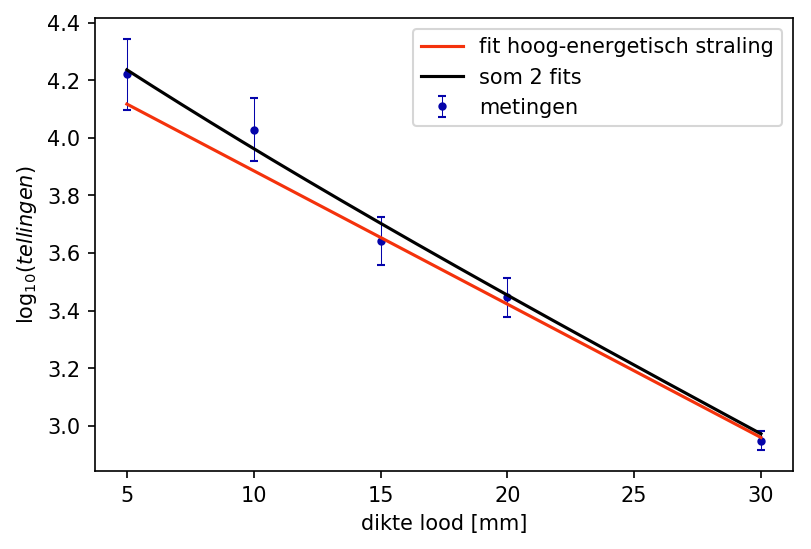

In [24]:
fig, ax = plt.subplots(1,1)

ax.errorbar(diktes, np.log(Pb), np.log(np.array(S_Pb))/7, fmt='.', color="xkcd:royal blue",
            capsize=2, barsabove=True, linewidth=0.5, label="metingen")
X = np.linspace(5, 30, 10000)
ax.plot(X, np.log(tellingen(X, *param_Pb2)), color="xkcd:vermillion", label="fit hoog-energetisch straling")
#ax.plot(X, np.log(tellingen(X, *param_Pb1)), color="xkcd:vermillion")
ax.plot(X, np.log(tellingen(X, *param_Pb2) + tellingen(X, *param_Pb1)), color="k", label="som 2 fits")

ax.set_xlabel("dikte lood [mm]")
ax.set_ylabel("$\log_{10}(tellingen)$")
plt.legend()

plt.show()

fig.savefig("absorptie_lood.%s" %EXTENSIE, dpi=300)

Print de gefitte parameters met hun fout

In [25]:
# absorptie van laag energetische gamma-straling
# output: A = ...
#         a = ...
# met I = A exp(-a*x)
for i in range(2):
    print("%.2f +- %.2f" %(param_Pb1[i], np.sqrt(covar_Pb1[i,i])))

15.44 +- 20.94
0.14 +- 0.18


In [26]:
# absorptie van hoog energetische gamma-straling
for i in range(2):
    print("%.4f +- %.4f" %(param_Pb2[i], np.sqrt(covar_Pb2[i,i])))

77.3721 +- 4.7150
0.0463 +- 0.0029


In [27]:
# halveringsdikte 1
sub = {mu : param_Pb1[1], S_mu : np.sqrt(covar_Pb1[1][1])}
display(d12.subs(sub), S_d12.subs(sub))
# halveringsdikte 2
sub = {mu : param_Pb2[1], S_mu : covar_Pb2[1][1]}
display(d12.subs(sub), S_d12.subs(sub))

### ijzer

In [28]:
# fit de functie door de laatste datapunten
param_Fe2, covar_Fe2 = opt.curve_fit(tellingen, diktes[2:], Fe[2:], (500, 0.01), S_Fe[2:])

# fit de functie door de eerste datapunten - de vorige fit
param_Fe1, covar_Fe1 = opt.curve_fit(tellingen, diktes[:3], 
                                     Fe[:3] - tellingen(diktes[:3], *param_Fe2),(500, 0.01), S_Fe[:3])

In [29]:
# berekenen p-waardes op de fits
chi2 = np.sum((tellingen(diktes[2:], *param_Fe2) - Fe[2:])**2 / S_Fe[2:]**2)
p = 1-nst.chi2.cdf(chi2, 3)
display(p, chi2)
# p-waarde voor fit lage energie
chi2 = np.sum((tellingen(diktes[:3], *param_Fe1) - Fe[:3] + 
               tellingen(diktes[:3], *param_Fe2))**2 / S_Fe[:3]**2)
p = 1-nst.chi2.cdf(chi2, 3)
display(p, chi2)

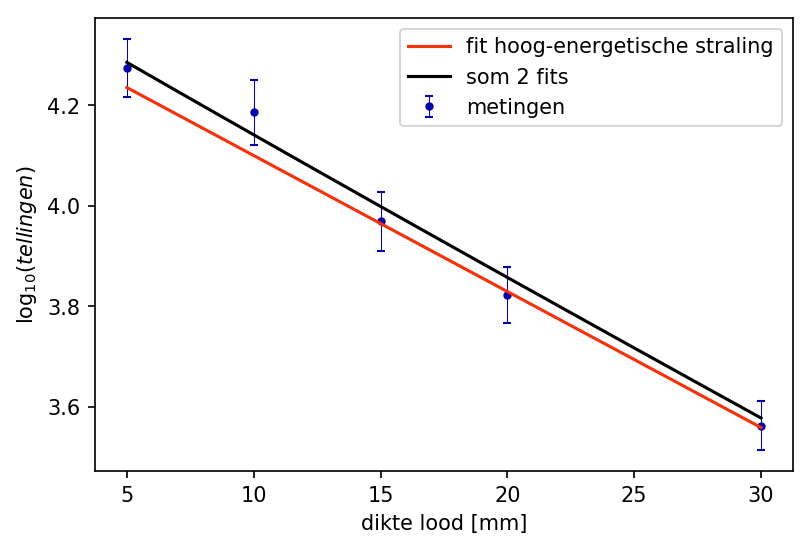

In [30]:
fig, ax = plt.subplots(1,1)

ax.errorbar(diktes, np.log(Fe), np.log(np.array(S_Fe))/20, fmt='.', color="xkcd:royal blue",
            capsize=2, barsabove=True, linewidth=0.5, label="metingen")
X = np.linspace(5, 30)
ax.plot(X, np.log(tellingen(X, *param_Fe2)), color="xkcd:vermillion", label="fit hoog-energetische straling")
ax.plot(X, np.log(tellingen(X, *param_Fe2) + tellingen(X, *param_Fe1)), color="k", label="som 2 fits")

ax.set_xlabel("dikte lood [mm]")
ax.set_ylabel("$\log_{10}(tellingen)$")
plt.legend()

plt.show()

fig.savefig("absorptie_ijzer.%s" %EXTENSIE, dpi=300)

In [31]:
# absorptie van laag energetische gamma-straling
# output: A = ...
#         a = ...
# met I = A exp(-a*x)
for i in range(2):
    print("%.3f +- %.3f" %(param_Fe1[i], np.sqrt(covar_Fe1[i,i])))

4.945 +- 7.722
0.066 +- 0.181


In [32]:
# absorptie van hoog energetische gamma-straling
for i in range(2):
    print("%.4f +- %.4f" %(param_Fe2[i], np.sqrt(covar_Fe2[i,i])))

79.0701 +- 1.4526
0.0271 +- 0.0009


In [33]:
# halveringsdikte 1
sub = {mu : param_Fe1[1], S_mu : np.sqrt(covar_Fe1[1][1])}
display(d12.subs(sub), S_d12.subs(sub))
# halveringsdikte 2
sub = {mu : param_Fe2[1], S_mu : covar_Fe2[1][1]}
display(d12.subs(sub), S_d12.subs(sub))

## tests